In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys
sys.path.append('src/')

eps=1e-8

from main import *
from utils import *

Transformation fo the mat files into csv files

In [2]:
file=hdf5storage.loadmat('../school_splits/school_b.mat')
mat_to_csv(file)

In [3]:
data=pd.read_csv('../data/school_results.csv')

y_df=data[['grade']]
X_df=data.drop(['grade'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.25)

### Algo 1

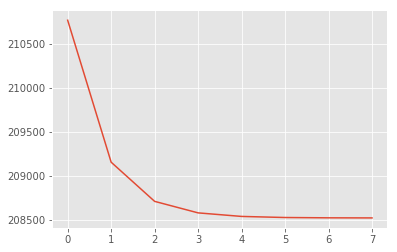

In [5]:
W,D,l,mineps,list_sqe=algo1_eps(X_train,y_train,gamma=1,tol=0.1,max_iter=20)
plt.plot(l)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.25)

W,D,l,l_sqe,l_sparse=algo1(X_train,y_train,gamma=1,epsilon=0.01,tol=1e-5,max_iter=30)

Cross-validation module (to use for results)

In [80]:
from sklearn.model_selection import KFold

skf=KFold(n_splits=3, shuffle=True)

err_tot=0
for train_is, test_is in skf.split(X_df):
    X_train=X_df.ix[train_is]
    X_test=X_df.ix[test_is]
    y_train=y_df.ix[train_is]
    y_test=y_df.ix[test_is]
    X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.25)

    W,D,l,l_sqe,l_sparse=algo1(X_train,y_train,gamma=1,epsilon=0.01,tol=1e-6,max_iter=30)
    _,U=np.linalg.eig(D)
    A=np.dot(U.T,W)
    y_test_pred=compute_y_pred(A,U,X_test)
    y_ts_arr=y_test.values.reshape(-1)
    err_tot+=explained_var(y_test_pred,y_ts_arr)

err_tot=err_tot/3
print('Total explained variance: ', err_tot)

139
139
139
Total explained variance:  0.362211997247


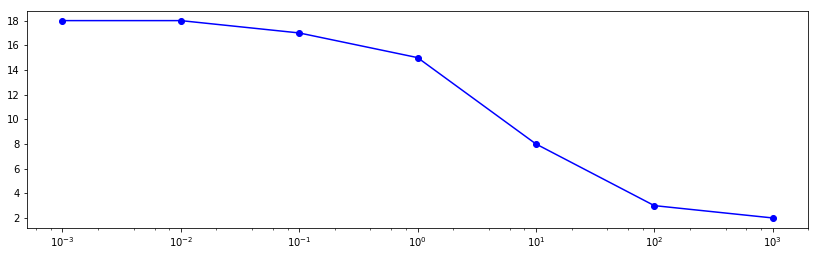

In [5]:
gammas=[]
n_feat=[]
for j in range(-3,4):
    gamma=10**(j)
    W,D,l,l_sqe,l_sparse=algo1(X_train,y_train,gamma,epsilon=0.01,tol=1e-5,max_iter=30)
    _,U=np.linalg.eig(D)
    A=np.dot(U.T,W)
    #print(gamma,[round(np.linalg.norm(a),1) for a in A])
    gammas.append(gamma)
    n_feat.append(len(np.where(np.array([round(np.linalg.norm(a),1) for a in A])>0)[0]))

fig, _ = plt.subplots(figsize=[14,4])
plt.scatter(gammas,n_feat,c='b')
plt.plot(gammas,n_feat,c='b')
plt.xscale('log')
plt.show()

651
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
(138,)
(513,)
651
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
(138,)
(513,)
651
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
(138,)
(513,)
651
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
(138,)
(513,)
651
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
(138,)
(513,)
651
Iteration:  1
Iteration:  2
Iteration:  3
(138,)
(513,)
651
Iteration:  1
Iteration:  2
(138,)
(513,)


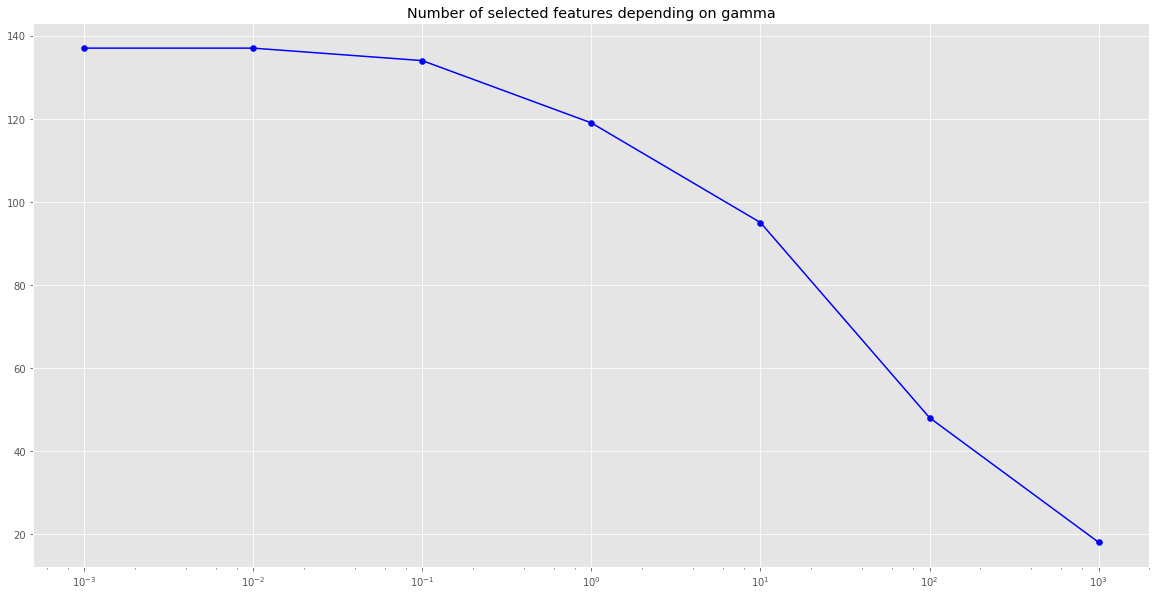

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.9)
gammas=[]
n_feat=[]

for j in range(-3,4):
    gamma=10**(j)
    B,K_til,mu_idx=algo2(X_train,y_train,gamma,
                     epsilon=0.1,tol=1e-5,max_iter=5)
    A=compute_A_from_B(B,K_til,mu_idx)
    #print(gamma,[round(np.linalg.norm(a),1) for a in A])
    gammas.append(gamma)
    n_feat.append(len(np.where(np.array([round(np.linalg.norm(a),3) for a in A.T])>0)[0]))
    #B_list.append(B)
plt.figure(figsize=(20,10))
plt.scatter(gammas,n_feat,c='b')
plt.plot(gammas,n_feat,c='b')
plt.xscale('log')
plt.title('Number of selected features depending on gamma')
plt.show()

### Algo 2

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.75)

B,list_cost,mineps=algo2_eps(X_train,y_train,gamma=0.1,epsilon_init=1e-7,tol=1e-3,tol_eps=1e-7,max_iter=10,kernel='gaussian',sigma=None)

641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10


In [9]:
B,K_til, mu_idx=algo2(X_train,y_train,gamma=0.1,epsilon=1e-5,tol=1e-3,max_iter=10,kernel='gaussian',sigma=None)
A=compute_A_from_B(B,K_til,mu_idx)

641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
(139,)
(502,)


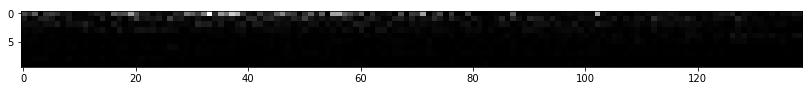

In [14]:
#Learned matrix in the kernel extension

fig, _ = plt.subplots(figsize=[14,4])
plt.imshow(abs(A.T)[:10],cmap="gray")
plt.show()

In [15]:
B,list_cost,mineps=algo2_eps(X_train,y_train,gamma=1,epsilon_init=1e-2,tol=1e-3,tol_eps=1e-7,max_iter=5,kernel='gaussian',sigma=None)

641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
641
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5


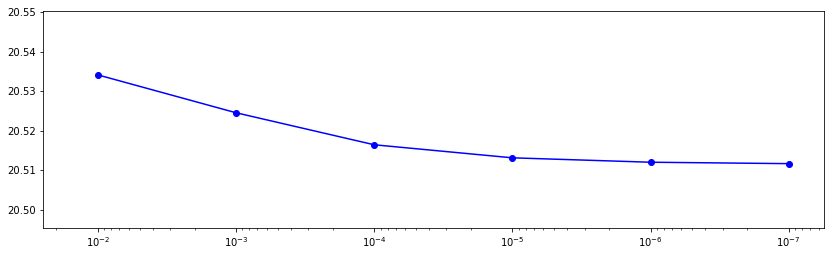

In [20]:
#Convergence on epsilon

eps_list=[10**(-j) for j in range(2,8)]
fig, _ = plt.subplots(figsize=[14,4])
plt.scatter(eps_list,list_cost,c='b')
plt.plot(eps_list,list_cost,c='b')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.show()
plt.show()